In [1]:
import pandas as pd
import numpy as np
import nltk
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

ModuleNotFoundError: No module named 'nltk'

In [ ]:
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords

In [2]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [ ]:
source_texts = pd.read_csv('/content/drive/MyDrive/сlassifier/source_texts_17.csv')

In [ ]:
from sklearn import preprocessing

In [ ]:
source_texts.shape

(1911, 4)

In [ ]:
source_texts = source_texts[source_texts.columns[5:]]

In [ ]:
source_texts.head()

texts  ... label
0  0,"Хочу войти в личный кабинет,не получается в...  ...     9
1  1,"Закройте ,Ашан !!!!!!!! Срочно! Автобусы до...  ...     4
2  2,"Уважаемый Сергей Семёнович! Прошу срочно ра...  ...     5
3                               3,Sherzod sadullayev  ...     1
4  4,"Согласно инструкции был сгенерирован логин ...  ...     9

[5 rows x 4 columns]

##Text cleaning

In [ ]:
for i in range(len(source_texts['texts'])):
        #source_texts['texts'][i] = source_texts['texts'][i].replace('.'," ")
        if "mos.ru" in source_texts['texts'][i]:
           source_texts['texts'][i] = source_texts['texts'][i].replace("mos.ru", "мосру")

##Data extension

In [ ]:
!pip install pymarkovchain

  Created wheel for pymarkovchain: filename=PyMarkovChain-1.8-cp37-none-any.whl size=4337 sha256=6daa7abb70896a661423dfd118b4394fe31a416e30a4ddfa0617eaaf8c5fa440
  Stored in directory: /root/.cache/pip/wheels/02/c2/05/edab4d5b8c9bf0bd202296ef44c0694e28d4e0a62f123ebad7
Successfully built pymarkovchain


In [ ]:
source_texts.to_csv('/content/drive/MyDrive/сlassifier/source_texts_17.csv', index=False)

In [ ]:
from pymarkovchain import MarkovChain

ModuleNotFoundError: ignored

In [ ]:
source_texts.describe()

Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1  Unnamed: 0.1.1.1        label
count  1911.000000   1911.000000     1911.000000       1911.000000  1911.000000
mean    955.000000    955.000000      955.000000        955.000000     6.000000
std     551.802501    551.802501      551.802501        551.802501     3.742637
min       0.000000      0.000000        0.000000          0.000000     0.000000
25%     477.500000    477.500000      477.500000        477.500000     3.000000
50%     955.000000    955.000000      955.000000        955.000000     6.000000
75%    1432.500000   1432.500000     1432.500000       1432.500000     9.000000
max    1910.000000   1910.000000     1910.000000       1910.000000    12.000000

In [ ]:
np.unique(source_texts['Classes'])

array(['Благоустройство', 'Медицина', 'Предложение благоустройство',
       'Предложение медицина', 'Предложение сайт',
       'Предложение транспорт', 'Предложение услуги', 'Сайт',
       'Сергей Семенович Собянин', 'Спам', 'Тех.поддержка', 'Транспорт',
       'Услуги'], dtype=object)

In [ ]:
for cl in np.unique(source_texts['Classes']):
    check_df = source_texts[source_texts['Classes']==cl]
    needs = len(check_df['texts'])
    if needs<150:
        mc = MarkovChain("./markov")
        texts = ".".join(list(check_df['texts']))
        mc.generateDatabase(texts)
        for i in range(147-needs):
            source_texts = source_texts.append({'texts': mc.generateString(), 'Classes': cl, 'Key_words': check_df.iloc[2,0]}, ignore_index=True)
            print(mc.generateString())

In [ ]:
mc = MarkovChain("./markov")

In [ ]:
source_texts[source_texts['Classes']=='Сайт']

Unnamed: 0  ...  label
0              0  ...      9
4              4  ...      9
5              5  ...      9
6              6  ...      9
10            10  ...      9
...          ...  ...    ...
1388        1388  ...      9
1389        1389  ...      9
1390        1390  ...      9
1391        1391  ...      9
1392        1392  ...      9

[147 rows x 8 columns]

In [ ]:
texts =  ".".join(list(source_texts[source_texts['Classes']=='Сайт']['texts']))

In [ ]:
texts

'0,"Хочу войти в личный кабинет,не получается восстановить логин и пароль".4,"Согласно инструкции был сгенерирован логин chembarisovaea и придуман пароль. Но под этими данными ребенок все равно не может войти.".5,Не могу восстановить пароль и войти в приложение..6,"Не могу зайти на страницу, выдаёт ошибкушибки: 2020-04-13-12-37-28-4BFCCE642FCE6CD1".10,Все время страница не доступна.22,Почему сервис не доступен.23,Не могу зайти.26,Не получается зарегистрировать.27,"удалите этот сайт, и никогда больше не делайте ничего, что связано с умственным трудом. это не для вас.".33,Не выдоёт поопуск после регестрации..34,Не приходит сообщение о подтверждении.38,Не могу зарегистрироваться!.44,Я работаю в кондитерском мне нужно разрешение от госуслуги.46,Как получить цифровой  код.49,"Как получить цифровой код по передвижению г,Москвы".50,Я хочу  получить  цифровую код.51,Я хочу  получить  цифровую код.52,"Чтоб пройти регистрацию на этом портале, а лучшем случае разбить смартфон о стену и в худшем с

In [ ]:
mc.generateDatabase(texts)
mc.generateString()

'Сколько нужно времени, чтобы понять и устранить явную техническую ошибку'

##Model testing

In [ ]:
source_texts['Classes'].value_counts()

Предложение благоустройство    147
Сергей Семенович Собянин       147
Предложение медицина           147
Тех.поддержка                  147
Транспорт                      147
Предложение услуги             147
Предложение сайт               147
Медицина                       147
Сайт                           147
Благоустройство                147
Услуги                         147
Спам                           147
Предложение транспорт          147
Name: Classes, dtype: int64

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import random
random.seed(1228)
from sklearn.feature_extraction.text import *
from sklearn.metrics import *
from sklearn.pipeline import Pipeline
import re
from pymystem3 import Mystem
import numpy as np
import itertools
%matplotlib inline
from sklearn.model_selection import train_test_split
 
import warnings
warnings.filterwarnings('ignore')
 
from nltk.stem.snowball import RussianStemmer
import seaborn as sns

In [ ]:
nltk.download('punkt')
source_texts['texts'] = source_texts['texts'].apply(nltk.word_tokenize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
m = Mystem()
regex = re.compile("[А-Яа-я]+")
 
def words_only(text, regex=regex):
    try:
        return " ".join(regex.findall(text))
    except:
        return ""
 
def lemmatize(text, mystem=m):
    try:
        return "".join(m.lemmatize(text)).strip()  
    except:
        return " "
 
def stemming(text, stemmer = RussianStemmer()):
    try:
        return " ".join([stemmer.stem(w) for w in text.split()])
    except:
        return " "

Installing mystem to /root/.local/bin/mystem from http://download.cdn.yandex.net/mystem/mystem-3.1-linux-64bit.tar.gz


In [ ]:
 source_texts = pd.read_csv('/content/drive/MyDrive/сlassifier/source_texts_17.csv')
 
from sklearn.feature_extraction.text import CountVectorizer
 
source_texts['texts'] = source_texts['texts'].apply(lambda x: ' '.join(x))
 
#count_vect = CountVectorizer()
#counts = count_vect.fit_transform(source_texts['texts'])

In [ ]:
le = preprocessing.LabelEncoder()
le.fit(source_texts['Classes'])
source_texts['Classes'] = le.transform(source_texts['Classes'])

In [ ]:
import pandas as pd

source_texts.dropna(subset=['texts', 'Classes'], inplace = True)

In [ ]:
source_texts['texts'] = list(map(lambda x: stemming(words_only(x)), source_texts['texts']))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(source_texts['texts'], source_texts['Classes'], test_size = 0.15)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


clf = Pipeline([
                ('vect', CountVectorizer(analyzer = 'char', ngram_range={4,6})),
                ('clf', LogisticRegression(solver='liblinear')),
])

clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='char', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range={4, 6}, preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('clf',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                          

In [ ]:
true = y_test
predictions = clf.predict(X_test)

Precision:   0.64
Recall:   0.61
F1-measure:   0.61
Accuracy:   0.61
              precision    recall  f1-score   support

           0       0.75      0.63      0.69        19
           1       0.71      0.59      0.65        17
           2       0.41      0.61      0.49        18
           3       0.65      0.52      0.58        21
           4       0.50      0.44      0.47        18
           5       0.74      0.63      0.68        27
           6       0.55      0.52      0.53        23
           7       0.62      0.58      0.60        26
           8       0.83      0.68      0.75        28
           9       0.36      0.64      0.46        25
          10       0.71      0.87      0.78        23
          11       0.88      0.79      0.83        19
          12       0.56      0.39      0.46        23

    accuracy                           0.61       287
   macro avg       0.64      0.61      0.61       287
weighted avg       0.64      0.61      0.62       287



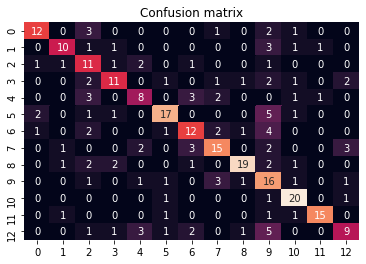

In [ ]:
print("Precision: {0:6.2f}".format(precision_score(true, predictions, average='macro')))
print("Recall: {0:6.2f}".format(recall_score(true, predictions, average='macro')))
print("F1-measure: {0:6.2f}".format(f1_score(true, predictions, average='macro')))
print("Accuracy: {0:6.2f}".format(accuracy_score(true, predictions)))
print(classification_report(true, predictions))
labels = clf.classes_



labels = clf.classes_
sns.heatmap(data=confusion_matrix(true, predictions), annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion matrix")
plt.show()

In [ ]:
from sklearn.svm import LinearSVC

clf = Pipeline([
                ('vect', CountVectorizer(analyzer = 'char', ngram_range={2,4})),
                ('clf', LinearSVC()),
])

clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='char', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range={2, 4}, preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('clf',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='squared_hinge', max_iter=1000,
                           multi_class='ovr', penalty='l2', random_state=None,
                           tol=0.000

In [ ]:
true = y_test
predictions = clf.predict(X_test)

Precision:   0.51
Recall:   0.50
F1-measure:   0.49
Accuracy:   0.50
              precision    recall  f1-score   support

           0       0.34      0.74      0.47        19
           1       0.58      0.41      0.48        17
           2       0.29      0.33      0.31        18
           3       0.43      0.43      0.43        21
           4       0.37      0.39      0.38        18
           5       0.74      0.52      0.61        27
           6       0.42      0.43      0.43        23
           7       0.59      0.50      0.54        26
           8       0.62      0.64      0.63        28
           9       0.45      0.36      0.40        25
          10       0.70      0.83      0.76        23
          11       0.81      0.68      0.74        19
          12       0.31      0.22      0.26        23

    accuracy                           0.50       287
   macro avg       0.51      0.50      0.49       287
weighted avg       0.52      0.50      0.50       287



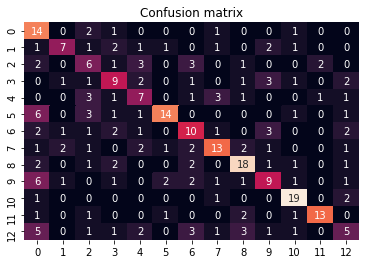

In [ ]:
print("Precision: {0:6.2f}".format(precision_score(true, predictions, average='macro')))
print("Recall: {0:6.2f}".format(recall_score(true, predictions, average='macro')))
print("F1-measure: {0:6.2f}".format(f1_score(true, predictions, average='macro')))
print("Accuracy: {0:6.2f}".format(accuracy_score(true, predictions)))
print(classification_report(true, predictions))
labels = clf.classes_



labels = clf.classes_
sns.heatmap(data=confusion_matrix(true, predictions), annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion matrix")
plt.show()

##Test

In [ ]:
import pandas as pd
import numpy as np
import nltk

In [ ]:
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
source_texts = pd.read_csv('/content/drive/MyDrive/сlassifier/source_texts_17.csv')

In [ ]:
source_texts.head()

Unnamed: 0  ...                             Key_words
0           0  ...         Логин, пароль, личный кабинет
1           1  ...                    Закройте, автобусы
2           2  ...  Палаты, короновирус, здравоохранение
3           3  ...                                   NaN
4           4  ...                         Логин, пароль

[5 rows x 4 columns]

In [ ]:
for i in range(len(source_texts['texts'])):
        #source_texts['texts'][i] = source_texts['texts'][i].replace('.'," ")
        if "mos.ru" in source_texts['texts'][i]:
           source_texts['texts'][i] = source_texts['texts'][i].replace("mos.ru", "мосру")

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from nltk.probability import FreqDist
from nltk.classify import SklearnClassifier
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


X_train, X_test, y_train, y_test = train_test_split(source_texts['texts'], source_texts['Classes'], test_size = 0.15)

clf = Pipeline([
                ('vect', CountVectorizer(analyzer = 'char', ngram_range={4,7})),
                ('scaler', StandardScaler(with_mean=False)), ('knn', KNeighborsClassifier(n_neighbors=4,  n_jobs=-1))
])

clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='char', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range={4, 7}, preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('scaler',
                 StandardScaler(copy=True, with_mean=False, with_std=True)),
                ('knn',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=-1, n_neighbor

In [ ]:
true = y_test
predictions = clf.predict(X_test)

Precision:   0.69
Recall:   0.35
F1-measure:   0.34
Accuracy:   0.36
                             precision    recall  f1-score   support

            Благоустройство       0.22      0.79      0.34        19
                   Медицина       0.80      0.39      0.52        31
Предложение благоустройство       0.50      0.11      0.17        19
       Предложение медицина       0.14      0.48      0.21        25
           Предложение сайт       1.00      0.09      0.17        22
      Предложение транспорт       1.00      0.36      0.53        25
         Предложение услуги       0.67      0.10      0.17        21
                       Сайт       1.00      0.05      0.10        19
   Сергей Семенович Собянин       0.62      0.56      0.59        18
                       Спам       1.00      0.10      0.17        21
              Тех.поддержка       0.79      0.73      0.76        26
                  Транспорт       0.22      0.65      0.32        17
                     Услуги      

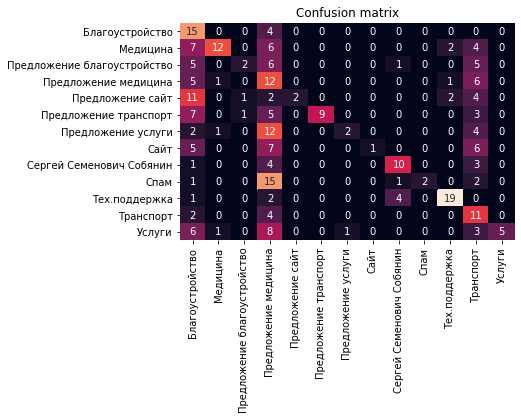

In [ ]:
from sklearn.metrics import *
print("Precision: {0:6.2f}".format(precision_score(true, predictions, average='macro')))
print("Recall: {0:6.2f}".format(recall_score(true, predictions, average='macro')))
print("F1-measure: {0:6.2f}".format(f1_score(true, predictions, average='macro')))
print("Accuracy: {0:6.2f}".format(accuracy_score(true, predictions)))
print(classification_report(true, predictions))
labels = clf.classes_

import seaborn as sns
import matplotlib.pyplot as plt

labels = clf.classes_
sns.heatmap(data=confusion_matrix(true, predictions), annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion matrix")
plt.show()

In [ ]:
def word2features(sent, i):
    word = sent[i][0]
    postag = sent[i][1]

    features = {
        'bias': 1.0,
        'word.lower()': word.lower(),
        'word[-3:]': word[-3:],
        'word[-2:]': word[-2:],
        'word.isupper()': word.isupper(),
        'word.istitle()': word.istitle(),
        'word.isdigit()': word.isdigit(),
        'postag': postag,
        'postag[:2]': postag[:2],
    }
    if i > 0:
        word1 = sent[i-1][0]
        postag1 = sent[i-1][1]
        features.update({
            '-1:word.lower()': word1.lower(),
            '-1:word.istitle()': word1.istitle(),
            '-1:word.isupper()': word1.isupper(),
            '-1:postag': postag1,
            '-1:postag[:2]': postag1[:2],
        })
    else:
        features['BOS'] = True

    if i < len(sent)-1:
        word1 = sent[i+1][0]
        postag1 = sent[i+1][1]
        features.update({
            '+1:word.lower()': word1.lower(),
            '+1:word.istitle()': word1.istitle(),
            '+1:word.isupper()': word1.isupper(),
            '+1:postag': postag1,
            '+1:postag[:2]': postag1[:2],
        })
    else:
        features['EOS'] = True

    return features


def sent2features(sent):
    return [word2features(sent, i) for i in range(len(sent))]

def sent2labels(sent):
    return [label for token, postag, label in sent]

def sent2tokens(sent):
    return [token for token, postag, label in sent]

# Naive Bayes

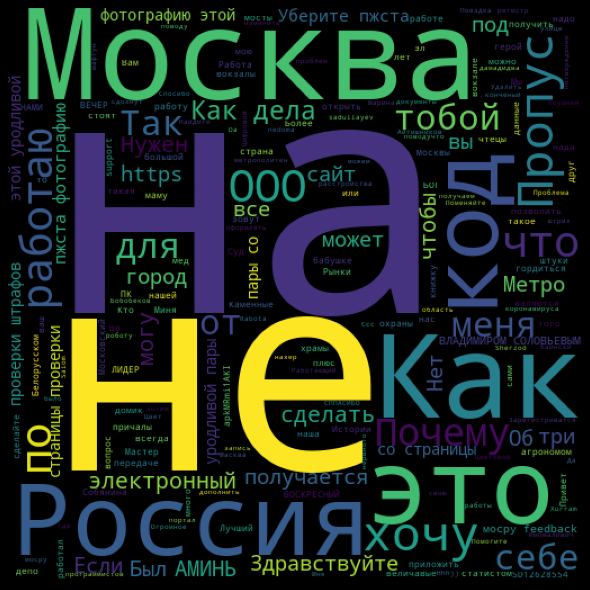

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from math import log, sqrt
import pandas as pd
import numpy as np
%matplotlib inline

totalTexts = source_texts['texts'].shape[0]
trainIndex, testIndex = list(), list()
for i in range(source_texts.shape[0]):
  if np.random.uniform(0, 1) < 0.75:
    trainIndex += [i]
  else: 
    testIndex += [i]
trainData = source_texts.loc[trainIndex]
testData = source_texts.loc[testIndex]

trainData.reset_index(inplace = True)
trainData.drop(['index'], axis = 1, inplace = True)
trainData.head()

spam_words = ' '.join(list(source_texts[source_texts['label'] == 1]['texts']))
spam_wc = WordCloud(width = 512, height = 512).generate(spam_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import nltk

In [ ]:
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
source_texts = pd.read_csv('/content/drive/MyDrive/сlassifier/source_texts_17.csv')

In [ ]:
source_texts.head()

Unnamed: 0  Unnamed: 0.1  ...                             Key_words label
0           0             0  ...         Логин, пароль, личный кабинет     0
1           1             1  ...                    Закройте, автобусы     0
2           2             2  ...  Палаты, короновирус, здравоохранение     0
3           3             3  ...                                   NaN     1
4           4             4  ...                         Логин, пароль     0

[5 rows x 6 columns]

In [ ]:
for i in range(len(source_texts['texts'])):
        #source_texts['texts'][i] = source_texts['texts'][i].replace('.'," ")
        if "mos.ru" in source_texts['texts'][i]:
           source_texts['texts'][i] = source_texts['texts'][i].replace("mos.ru", "мосру")

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from nltk.probability import FreqDist
from nltk.classify import SklearnClassifier
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(source_texts['texts'], source_texts['label'], test_size = 0.15)

clf = Pipeline([
                ('vect', CountVectorizer(analyzer = 'char', ngram_range={4,7})),
                ('nb', MultinomialNB())
])

clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='char', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range={4, 7}, preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('nb',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [ ]:
true = y_test
predictions = clf.predict(X_test)

Precision:   0.81
Recall:   0.73
F1-measure:   0.73
Accuracy:   0.74
              precision    recall  f1-score   support

           0       0.93      0.82      0.87        17
           1       0.88      0.41      0.56        17
           2       1.00      0.42      0.59        24
           3       1.00      0.71      0.83        21
           4       0.61      0.48      0.54        23
           5       0.70      0.84      0.76        25
           6       0.49      0.90      0.63        29
           7       0.36      0.92      0.52        13
           8       0.95      0.76      0.84        25
           9       0.80      0.71      0.75        17
          10       0.86      0.93      0.89        27
          11       1.00      0.88      0.93        32
          12       0.92      0.71      0.80        17

    accuracy                           0.74       287
   macro avg       0.81      0.73      0.73       287
weighted avg       0.82      0.74      0.75       287



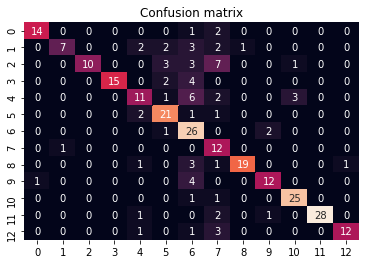

In [ ]:
from sklearn.metrics import *
print("Precision: {0:6.2f}".format(precision_score(true, predictions, average='macro')))
print("Recall: {0:6.2f}".format(recall_score(true, predictions, average='macro')))
print("F1-measure: {0:6.2f}".format(f1_score(true, predictions, average='macro')))
print("Accuracy: {0:6.2f}".format(accuracy_score(true, predictions)))
print(classification_report(true, predictions))
labels = clf.classes_

import seaborn as sns
import matplotlib.pyplot as plt

labels = clf.classes_
sns.heatmap(data=confusion_matrix(true, predictions), annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion matrix")
plt.show()

# k-nearest neighbors

In [ ]:
import pandas as pd
import numpy as np
import nltk

In [ ]:
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
source_texts = pd.read_csv('/content/drive/MyDrive/сlassifier/source_texts_17.csv')

In [ ]:
source_texts.head()

Unnamed: 0  ...                             Key_words
0           0  ...         Логин, пароль, личный кабинет
1           1  ...                    Закройте, автобусы
2           2  ...  Палаты, короновирус, здравоохранение
3           3  ...                                   NaN
4           4  ...                         Логин, пароль

[5 rows x 4 columns]

In [ ]:
for i in range(len(source_texts['texts'])):
        #source_texts['texts'][i] = source_texts['texts'][i].replace('.'," ")
        if "mos.ru" in source_texts['texts'][i]:
           source_texts['texts'][i] = source_texts['texts'][i].replace("mos.ru", "мосру")

In [ ]:
from sklearn.pipeline import Pipeline
from nltk.probability import FreqDist
from nltk.classify import SklearnClassifier
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


X_train, X_test, y_train, y_test = train_test_split(source_texts['texts'], source_texts['Classes'], test_size = 0.15)

clf = Pipeline([
                ('vect', CountVectorizer(analyzer = 'char', ngram_range={4,6})),
                ('scaler', StandardScaler(with_mean=False)), ('knn', KNeighborsClassifier(n_jobs=-1))
])

clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='char', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range={4, 6}, preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('scaler',
                 StandardScaler(copy=True, with_mean=False, with_std=True)),
                ('knn',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=-1, n_neighbor

In [ ]:
true = y_test
predictions = clf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision:   0.56
Recall:   0.38
F1-measure:   0.37
Accuracy:   0.39
                             precision    recall  f1-score   support

            Благоустройство       0.23      0.44      0.30        27
                   Медицина       0.54      0.41      0.47        17
Предложение благоустройство       0.36      0.22      0.28        18
       Предложение медицина       0.35      0.38      0.36        21
           Предложение сайт       1.00      0.04      0.08        24
      Предложение транспорт       0.75      0.52      0.62        23
         Предложение услуги       0.89      0.33      0.48        24
                       Сайт       0.00      0.00      0.00        18
   Сергей Семенович Собянин       0.50      0.41      0.45        22
                       Спам       1.00      0.04      0.08        25
              Тех.поддержка       0.82      0.86      0.84        21
                  Транспорт       0.61      0.58      0.60        24
                     Услуги      

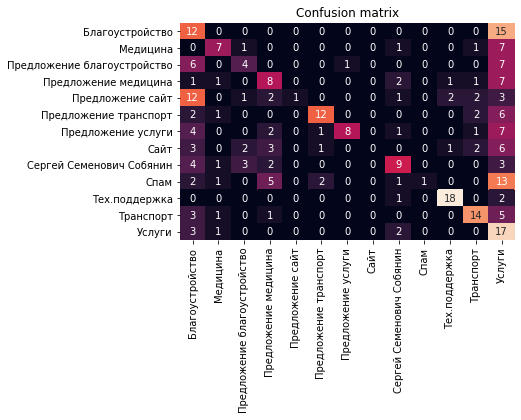

In [ ]:
from sklearn.metrics import *
print("Precision: {0:6.2f}".format(precision_score(true, predictions, average='macro')))
print("Recall: {0:6.2f}".format(recall_score(true, predictions, average='macro')))
print("F1-measure: {0:6.2f}".format(f1_score(true, predictions, average='macro')))
print("Accuracy: {0:6.2f}".format(accuracy_score(true, predictions)))
print(classification_report(true, predictions))
labels = clf.classes_

import seaborn as sns
import matplotlib.pyplot as plt

labels = clf.classes_
sns.heatmap(data=confusion_matrix(true, predictions), annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion matrix")
plt.show()

# Boosting and Bagging


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(source_texts['texts'], source_texts['Classes'], test_size = 0.15)

In [ ]:
text_clf = Pipeline([('vect',CountVectorizer(analyzer = 'char', ngram_range={3,5})),
                     ('tfidf', TfidfTransformer()),
                     ('clf', GradientBoostingClassifier(n_estimators=100)),
                     ])

text_clf.fit(X_train, y_train)

KeyboardInterrupt: ignored

In [ ]:
true = y_test
predictions = text_clf.predict(X_test)

Precision:   0.57
Recall:   0.54
F1-measure:   0.54
Accuracy:   0.55
                             precision    recall  f1-score   support

            Благоустройство       0.67      0.67      0.67        27
                   Медицина       0.64      0.61      0.62        23
Предложение благоустройство       0.31      0.22      0.26        18
       Предложение медицина       0.48      0.46      0.47        24
           Предложение сайт       0.59      0.67      0.63        24
      Предложение транспорт       0.61      0.52      0.56        21
         Предложение услуги       0.40      0.40      0.40        20
                       Сайт       0.52      0.48      0.50        23
   Сергей Семенович Собянин       0.86      0.67      0.75        27
                       Спам       0.20      0.50      0.29        16
              Тех.поддержка       0.65      0.81      0.72        21
                  Транспорт       0.95      0.72      0.82        25
                     Услуги      

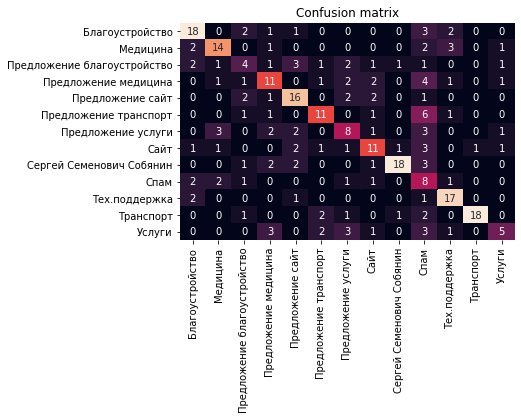

In [ ]:
from sklearn.metrics import *
print("Precision: {0:6.2f}".format(precision_score(true, predictions, average='macro')))
print("Recall: {0:6.2f}".format(recall_score(true, predictions, average='macro')))
print("F1-measure: {0:6.2f}".format(f1_score(true, predictions, average='macro')))
print("Accuracy: {0:6.2f}".format(accuracy_score(true, predictions)))
print(classification_report(true, predictions))
labels = text_clf.classes_

import seaborn as sns
import matplotlib.pyplot as plt

labels = text_clf.classes_
sns.heatmap(data=confusion_matrix(true, predictions), annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion matrix")
plt.show()

# Decision Tree

In [ ]:
Decision Tree

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(source_texts['texts'], source_texts['Classes'], test_size = 0.15)
print()

In [ ]:
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.datasets import fetch_20newsgroups


In [ ]:
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', NearestCentroid()),
                     ])

text_clf.fit(X_train, y_train)

ValueError: ignored

# Bagging

# Новый раздел

In [ ]:
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.datasets import fetch_20newsgroups

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from nltk.probability import FreqDist
from nltk.classify import SklearnClassifier
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [ ]:
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', GradientBoostingClassifier(n_estimators=100)),
                     ])
text_clf.fit(X_train, y_train)

NameError: ignored

In [ ]:
true = y_test
predictions = text_clf.predict(X_test)

from sklearn.metrics import *
print("Precision: {0:6.2f}".format(precision_score(true, predictions, average='macro')))
print("Recall: {0:6.2f}".format(recall_score(true, predictions, average='macro')))
print("F1-measure: {0:6.2f}".format(f1_score(true, predictions, average='macro')))
print("Accuracy: {0:6.2f}".format(accuracy_score(true, predictions)))
print(classification_report(true, predictions))
labels = text_clf.classes_

import seaborn as sns
import matplotlib.pyplot as plt

labels = text_clf.classes_
sns.heatmap(data=confusion_matrix(true, predictions), annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion matrix")
plt.show()

# Новый раздел

In [ ]:
print(metrics.classification_report(y_test, predictions))

                             precision    recall  f1-score   support

            Благоустройство       0.38      0.78      0.51        23
                   Медицина       0.88      0.82      0.85        17
Предложение благоустройство       0.50      0.43      0.46        14
       Предложение медицина       0.33      0.74      0.46        19
           Предложение сайт       1.00      0.18      0.30        17
      Предложение транспорт       0.85      0.55      0.67        20
         Предложение услуги       0.55      0.50      0.52        22
                       Сайт       1.00      0.26      0.41        27
   Сергей Семенович Собянин       0.92      0.60      0.73        20
                       Спам       1.00      0.21      0.34        29
              Тех.поддержка       0.94      0.85      0.89        34
                  Транспорт       0.85      0.71      0.77        24
                     Услуги       0.29      0.76      0.42        21

                   accuracy     

# SVM_soft interval classification


In [ ]:
import pandas as pd
import numpy as np
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords
source_texts = pd.read_csv('/content/drive/MyDrive/сlassifier/source_texts_17.csv')
source_texts.head()
for i in range(len(source_texts['texts'])):
        #source_texts['texts'][i] = source_texts['texts'][i].replace('.'," ")
        if "mos.ru" in source_texts['texts'][i]:
           source_texts['texts'][i] = source_texts['texts'][i].replace("mos.ru", "мосру")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from nltk.probability import FreqDist
from nltk.classify import SklearnClassifier
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

X_train, X_test, y_train, y_test = train_test_split(source_texts['texts'], source_texts['Classes'], test_size = 0.15)

clf = Pipeline([
                ('vect', CountVectorizer(analyzer = 'char', ngram_range={3,7})),
                ("scaler", StandardScaler(with_mean=False)),
                ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42))
])

clf.fit(X_train, y_train)


true = y_test
predictions = clf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Precision:   0.67
Recall:   0.66
F1-measure:   0.66
Accuracy:   0.65
                             precision    recall  f1-score   support

            Благоустройство       0.78      0.64      0.70        22
                   Медицина       0.64      0.78      0.71        23
Предложение благоустройство       0.71      0.71      0.71        17
       Предложение медицина       0.53      0.56      0.55        16
           Предложение сайт       0.30      0.30      0.30        27
      Предложение транспорт       0.76      0.63      0.69        30
         Предложение услуги       0.50      0.71      0.59        24
                       Сайт       0.71      0.57      0.63        21
   Сергей Семенович Собянин       0.68      0.68      0.68        25
                       Спам       0.67      0.57      0.62        21
              Тех.поддержка       0.85      0.89      0.87        19
                  Транспорт       0.62      0.88      0.73        17
                     Услуги      

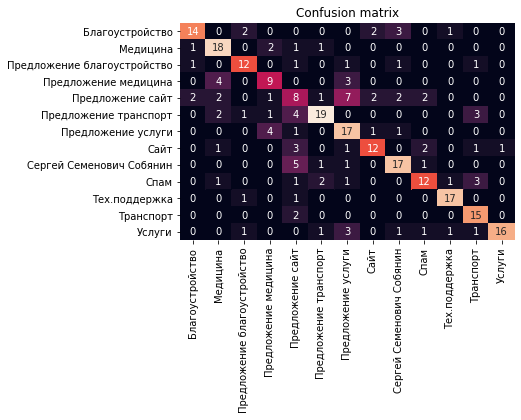

In [ ]:

from sklearn.metrics import *
print("Precision: {0:6.2f}".format(precision_score(true, predictions, average='macro')))
print("Recall: {0:6.2f}".format(recall_score(true, predictions, average='macro')))
print("F1-measure: {0:6.2f}".format(f1_score(true, predictions, average='macro')))
print("Accuracy: {0:6.2f}".format(accuracy_score(true, predictions)))
print(classification_report(true, predictions))
labels = clf.classes_

import seaborn as sns
import matplotlib.pyplot as plt

labels = clf.classes_
sns.heatmap(data=confusion_matrix(true, predictions), annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion matrix")
plt.show()

# Новый раздел

In [ ]:
import pandas as pd
import numpy as np
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords
source_texts = pd.read_csv('/content/drive/MyDrive/сlassifier/source_texts_17.csv')
source_texts.head()
for i in range(len(source_texts['texts'])):
        #source_texts['texts'][i] = source_texts['texts'][i].replace('.'," ")
        if "mos.ru" in source_texts['texts'][i]:
           source_texts['texts'][i] = source_texts['texts'][i].replace("mos.ru", "мосру")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from nltk.probability import FreqDist
from nltk.classify import SklearnClassifier
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.preprocessing import PolynomialFeatures

X_train, X_test, y_train, y_test = train_test_split(source_texts['texts'], source_texts['Classes'], test_size = 0.15)

clf = Pipeline([
                ('vect', CountVectorizer(analyzer = 'char', ngram_range={3,7})),
                ('poly_features', PolynomialFeatures(degree=3)),
                ("scaler", StandardScaler(with_mean=False)),
                ("linear_svc", LinearSVC(C=10, loss="hinge", random_state=42))
])

clf.fit(X_train, y_train)


true = y_test
predictions = clf.predict(X_test)

KeyboardInterrupt: ignored

In [ ]:
from sklearn.metrics import *
print("Precision: {0:6.2f}".format(precision_score(true, predictions, average='macro')))
print("Recall: {0:6.2f}".format(recall_score(true, predictions, average='macro')))
print("F1-measure: {0:6.2f}".format(f1_score(true, predictions, average='macro')))
print("Accuracy: {0:6.2f}".format(accuracy_score(true, predictions)))
print(classification_report(true, predictions))
labels = clf.classes_

import seaborn as sns
import matplotlib.pyplot as plt

labels = clf.classes_
sns.heatmap(data=confusion_matrix(true, predictions), annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion matrix")
plt.show()

# Новый раздел

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import *
from sklearn.feature_extraction.text import CountVectorizer

#models
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.ensemble import GradientBoostingClassifier

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.nearest_centroid module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
scorer = make_scorer(f1_score, average='macro')

In [ ]:
pipe_lr = Pipeline([('vect', CountVectorizer(analyzer='char', ngram_range={4,6})),
                   ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(random_state=42))])

pipe_mnb = Pipeline([('vect', CountVectorizer(analyzer='char', ngram_range={3,7})),
                 ('tfidf', TfidfTransformer()),
                 ('clf',MultinomialNB())])

pipe_rf = Pipeline([('vect', CountVectorizer(analyzer='char', ngram_range={4,6})),
                   ('tfidf', TfidfTransformer()),
            ('clf', RandomForestClassifier(random_state=42))])


pipe_svm = Pipeline([('vect', CountVectorizer(analyzer='char', ngram_range={4,6})),
                   ('tfidf', TfidfTransformer()),
            ('clf', LinearSVC(random_state=42))])

In [ ]:
param_range = [9, 10]
param_range_fl = [1.0, 0.5]

grid_params_lr = [{'clf__penalty': ['l2'],
        'clf__C': param_range_fl,
        'clf__solver': ['lbfgs']}] 


grid_params_rf = [{'clf__criterion': ['gini', 'entropy'],
        'clf__max_depth': param_range,
        'clf__min_samples_split': param_range[1:]}]

grid_params_svm = [{ 
        'clf__C': param_range}]

grid_params_mnb = [{
    'clf__fit_prior': [True, False],
    'clf__alpha': np.arange(0, 1, 0.1) 
}]
# Construct grid searches
jobs = -1

LR = GridSearchCV(estimator=pipe_lr,
            param_grid=grid_params_lr,
            scoring=scorer,
            cv=10) 



RF = GridSearchCV(estimator=pipe_rf,
            param_grid=grid_params_rf,
            scoring=scorer,
            cv=10, 
            n_jobs=jobs)


SVM = GridSearchCV(estimator=pipe_svm,
            param_grid=grid_params_svm,
            scoring=scorer,
            cv=10,
            n_jobs=jobs)

MNB =  GridSearchCV(estimator=pipe_mnb,
            param_grid=grid_params_mnb,
            scoring=scorer,
            cv=10,
            n_jobs=jobs)

# List of pipelines for iterating through each of them
grids = [MNB]

In [ ]:
grid_dict = {0: 'Logistic Regression', 
        1: 'Random Forest',
        2: 'Support Vector Machine',
        3: 'Multinomial Naive Bayes'}

In [ ]:
print('Performing model optimizations...')
best_acc = 0.0
best_clf = 0
best_gs = ''
for idx, gs in enumerate(grids):
    print('\nEstimator: %s' % grid_dict[idx])
    gs.fit(X_train, y_train)
    print('Best params are : %s' % gs.best_params_)
    # Best training data accuracy
    print('Best training accuracy: %.3f' % gs.best_score_)
    # Predict on test data with best params
    y_pred = gs.predict(X_test)
    # Test data accuracy of model with best params
    print('Test set accuracy score for best params: %.3f ' % f1_score(y_test, y_pred, average='macro'))
    # Track best (highest test accuracy) model
    if f1_score(y_test, y_pred, average='macro') > best_acc:
        best_acc = f1_score(y_test, y_pred, average='macro')
        best_gs = gs
        best_clf = idx
print('\nClassifier with best test set accuracy: %s' % grid_dict[best_clf])

Performing model optimizations...

Estimator: Logistic Regression


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Best params are : {'clf__alpha': 0.0, 'clf__fit_prior': False}
Best training accuracy: 0.726
Test set accuracy score for best params: 0.722 

Classifier with best test set accuracy: Logistic Regression


# WordClouds

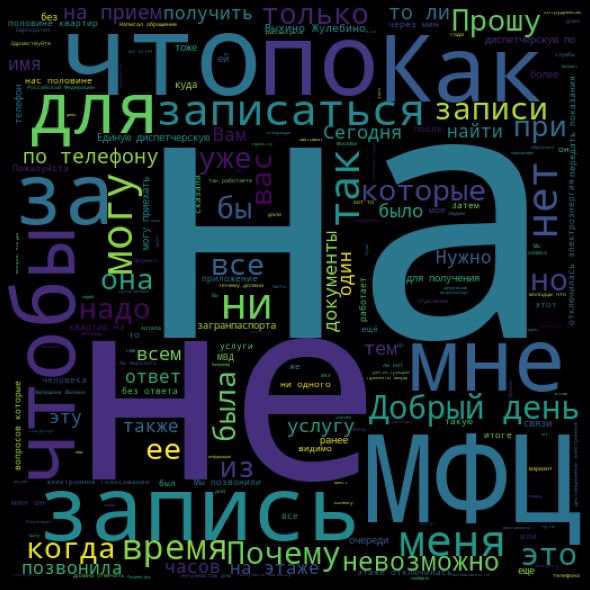

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from math import log, sqrt
import pandas as pd
import numpy as np
%matplotlib inline

totalTexts = source_texts['texts'].shape[0]
trainIndex, testIndex = list(), list()
for i in range(source_texts.shape[0]):
  if np.random.uniform(0, 1) < 0.75:
    trainIndex += [i]
  else: 
    testIndex += [i]
trainData = source_texts.loc[trainIndex]
testData = source_texts.loc[testIndex]

trainData.reset_index(inplace = True)
trainData.drop(['index'], axis = 1, inplace = True)
trainData.head()

spam_words = ' '.join(list(source_texts[source_texts['label'] == 0]['texts']))
spam_wc = WordCloud(width = 512, height = 512).generate(spam_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

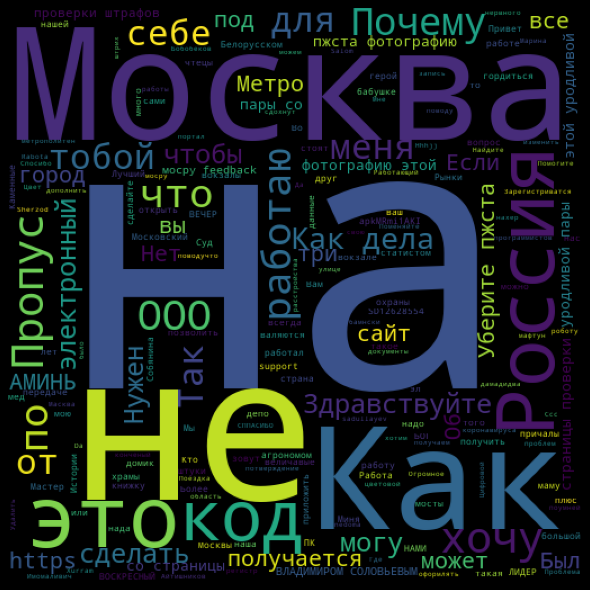

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from math import log, sqrt
import pandas as pd
import numpy as np
%matplotlib inline

totalTexts = source_texts['texts'].shape[0]
trainIndex, testIndex = list(), list()
for i in range(source_texts.shape[0]):
  if np.random.uniform(0, 1) < 0.75:
    trainIndex += [i]
  else: 
    testIndex += [i]
trainData = source_texts.loc[trainIndex]
testData = source_texts.loc[testIndex]

trainData.reset_index(inplace = True)
trainData.drop(['index'], axis = 1, inplace = True)
trainData.head()

spam_words = ' '.join(list(source_texts[source_texts['label'] == 1]['texts']))
spam_wc = WordCloud(width = 512, height = 512).generate(spam_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

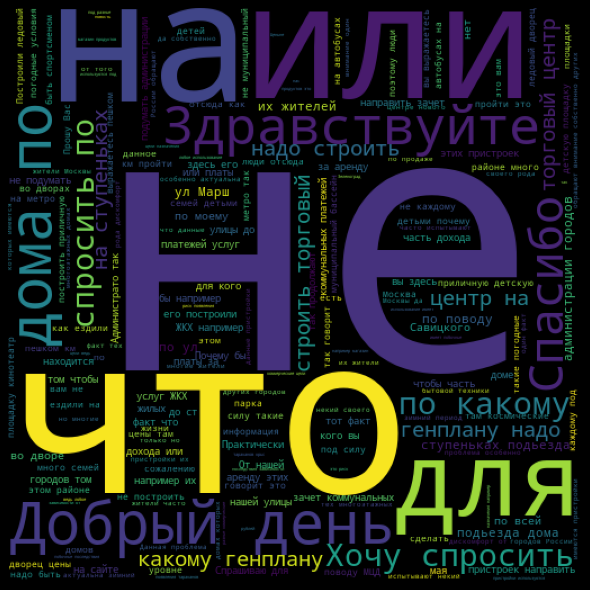

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from math import log, sqrt
import pandas as pd
import numpy as np
%matplotlib inline

totalTexts = source_texts['texts'].shape[0]
trainIndex, testIndex = list(), list()
for i in range(source_texts.shape[0]):
  if np.random.uniform(0, 1) < 0.75:
    trainIndex += [i]
  else: 
    testIndex += [i]
trainData = source_texts.loc[trainIndex]
testData = source_texts.loc[testIndex]

trainData.reset_index(inplace = True)
trainData.drop(['index'], axis = 1, inplace = True)
trainData.head()

spam_words = ' '.join(list(source_texts[source_texts['label'] == 2]['texts']))
spam_wc = WordCloud(width = 512, height = 512).generate(spam_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

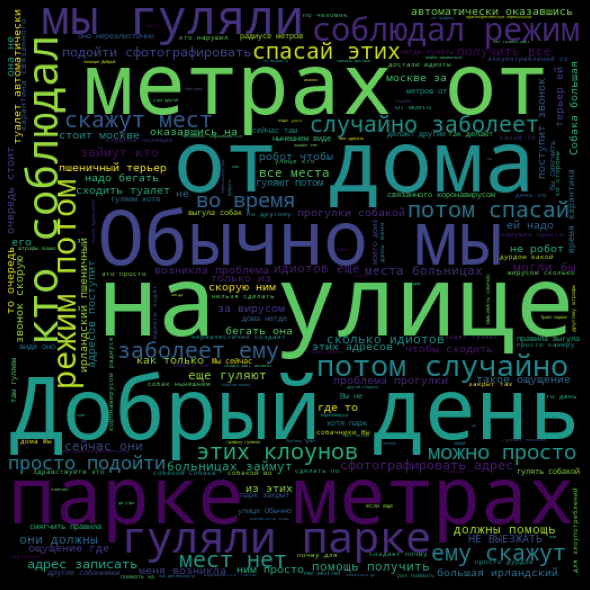

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from math import log, sqrt
import pandas as pd
import numpy as np
%matplotlib inline

totalTexts = source_texts['texts'].shape[0]
trainIndex, testIndex = list(), list()
for i in range(source_texts.shape[0]):
  if np.random.uniform(0, 1) < 0.75:
    trainIndex += [i]
  else: 
    testIndex += [i]
trainData = source_texts.loc[trainIndex]
testData = source_texts.loc[testIndex]

trainData.reset_index(inplace = True)
trainData.drop(['index'], axis = 1, inplace = True)
trainData.head()

spam_words = ' '.join(list(source_texts[source_texts['label'] == 3]['texts']))
spam_wc = WordCloud(width = 512, height = 512).generate(spam_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

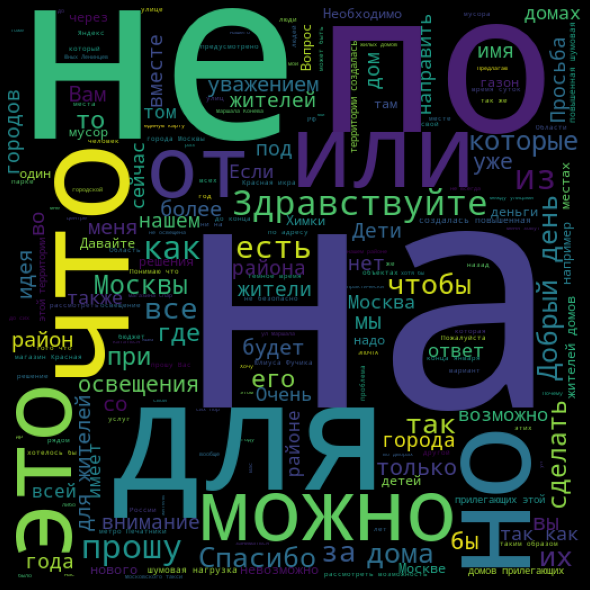

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from math import log, sqrt
import pandas as pd
import numpy as np
%matplotlib inline

totalTexts = source_texts['texts'].shape[0]
trainIndex, testIndex = list(), list()
for i in range(source_texts.shape[0]):
  if np.random.uniform(0, 1) < 0.75:
    trainIndex += [i]
  else: 
    testIndex += [i]
trainData = source_texts.loc[trainIndex]
testData = source_texts.loc[testIndex]

trainData.reset_index(inplace = True)
trainData.drop(['index'], axis = 1, inplace = True)
trainData.head()

spam_words = ' '.join(list(source_texts[source_texts['label'] == 4]['texts']))
spam_wc = WordCloud(width = 512, height = 512).generate(spam_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

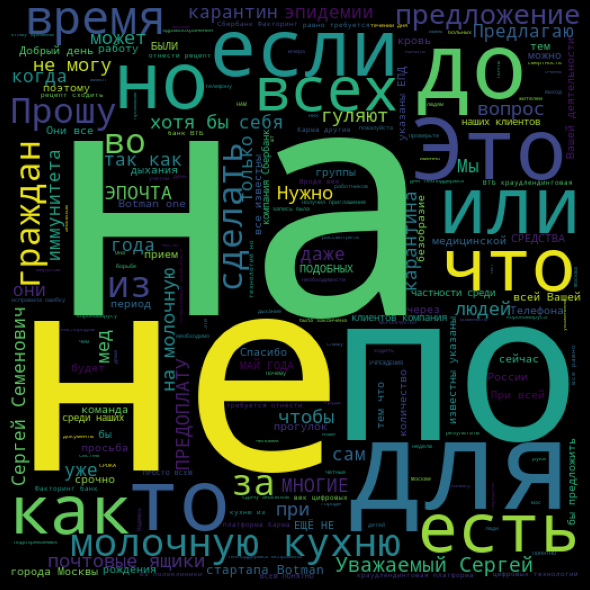

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from math import log, sqrt
import pandas as pd
import numpy as np
%matplotlib inline

totalTexts = source_texts['texts'].shape[0]
trainIndex, testIndex = list(), list()
for i in range(source_texts.shape[0]):
  if np.random.uniform(0, 1) < 0.75:
    trainIndex += [i]
  else: 
    testIndex += [i]
trainData = source_texts.loc[trainIndex]
testData = source_texts.loc[testIndex]

trainData.reset_index(inplace = True)
trainData.drop(['index'], axis = 1, inplace = True)
trainData.head()

spam_words = ' '.join(list(source_texts[source_texts['label'] == 5]['texts']))
spam_wc = WordCloud(width = 512, height = 512).generate(spam_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

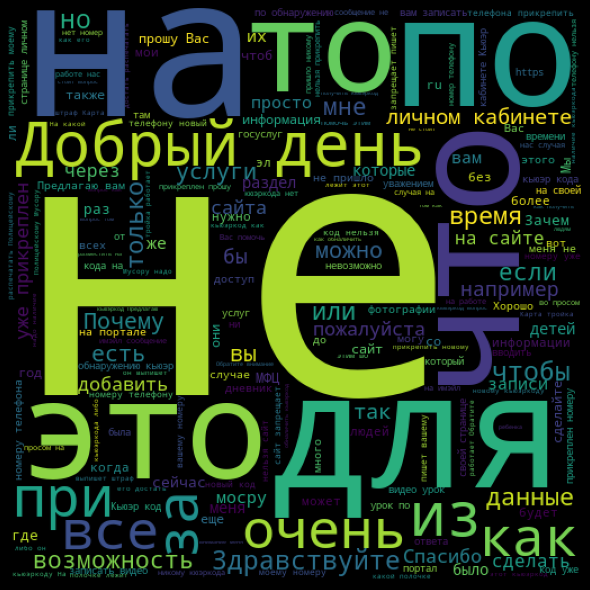

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from math import log, sqrt
import pandas as pd
import numpy as np
%matplotlib inline

totalTexts = source_texts['texts'].shape[0]
trainIndex, testIndex = list(), list()
for i in range(source_texts.shape[0]):
  if np.random.uniform(0, 1) < 0.75:
    trainIndex += [i]
  else: 
    testIndex += [i]
trainData = source_texts.loc[trainIndex]
testData = source_texts.loc[testIndex]

trainData.reset_index(inplace = True)
trainData.drop(['index'], axis = 1, inplace = True)
trainData.head()

spam_words = ' '.join(list(source_texts[source_texts['label'] == 6]['texts']))
spam_wc = WordCloud(width = 512, height = 512).generate(spam_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

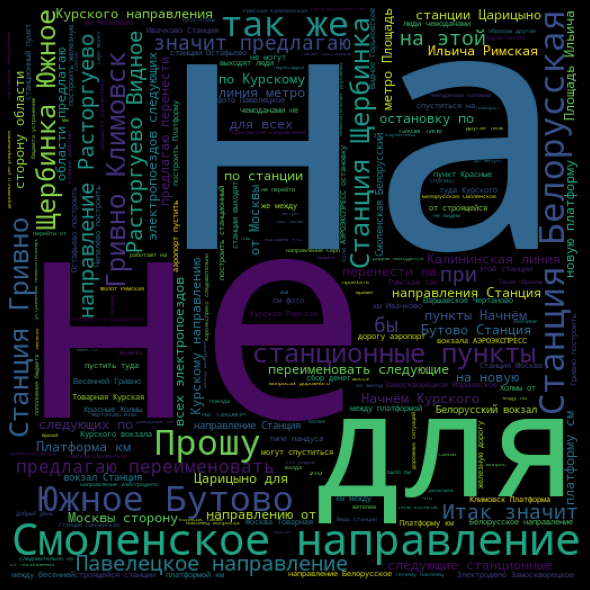

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from math import log, sqrt
import pandas as pd
import numpy as np
%matplotlib inline

totalTexts = source_texts['texts'].shape[0]
trainIndex, testIndex = list(), list()
for i in range(source_texts.shape[0]):
  if np.random.uniform(0, 1) < 0.75:
    trainIndex += [i]
  else: 
    testIndex += [i]
trainData = source_texts.loc[trainIndex]
testData = source_texts.loc[testIndex]

trainData.reset_index(inplace = True)
trainData.drop(['index'], axis = 1, inplace = True)
trainData.head()

spam_words = ' '.join(list(source_texts[source_texts['label'] == 7]['texts']))
spam_wc = WordCloud(width = 512, height = 512).generate(spam_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

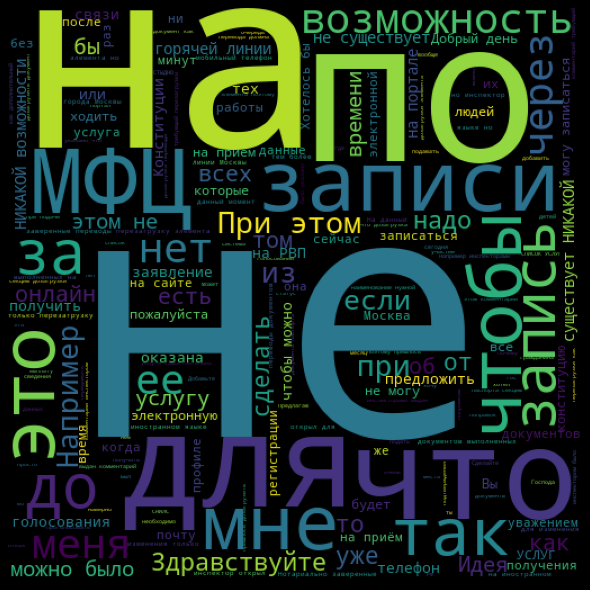

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from math import log, sqrt
import pandas as pd
import numpy as np
%matplotlib inline

totalTexts = source_texts['texts'].shape[0]
trainIndex, testIndex = list(), list()
for i in range(source_texts.shape[0]):
  if np.random.uniform(0, 1) < 0.75:
    trainIndex += [i]
  else: 
    testIndex += [i]
trainData = source_texts.loc[trainIndex]
testData = source_texts.loc[testIndex]

trainData.reset_index(inplace = True)
trainData.drop(['index'], axis = 1, inplace = True)
trainData.head()

spam_words = ' '.join(list(source_texts[source_texts['label'] == 8]['texts']))
spam_wc = WordCloud(width = 512, height = 512).generate(spam_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

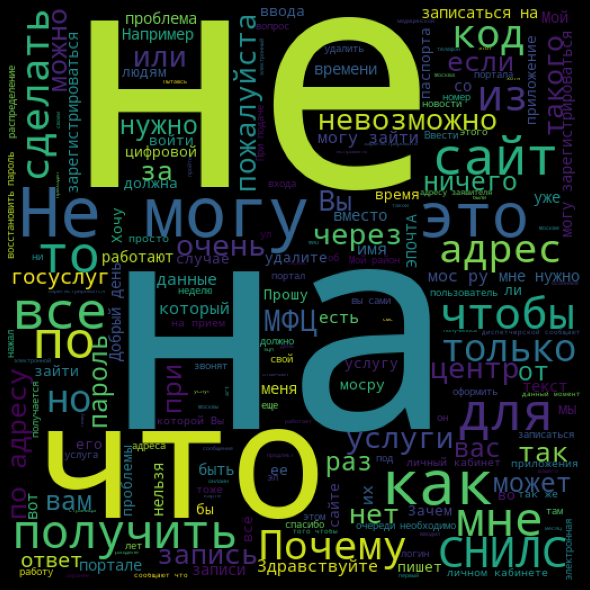

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from math import log, sqrt
import pandas as pd
import numpy as np
%matplotlib inline

totalTexts = source_texts['texts'].shape[0]
trainIndex, testIndex = list(), list()
for i in range(source_texts.shape[0]):
  if np.random.uniform(0, 1) < 0.75:
    trainIndex += [i]
  else: 
    testIndex += [i]
trainData = source_texts.loc[trainIndex]
testData = source_texts.loc[testIndex]

trainData.reset_index(inplace = True)
trainData.drop(['index'], axis = 1, inplace = True)
trainData.head()

spam_words = ' '.join(list(source_texts[source_texts['label'] == 9]['texts']))
spam_wc = WordCloud(width = 512, height = 512).generate(spam_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

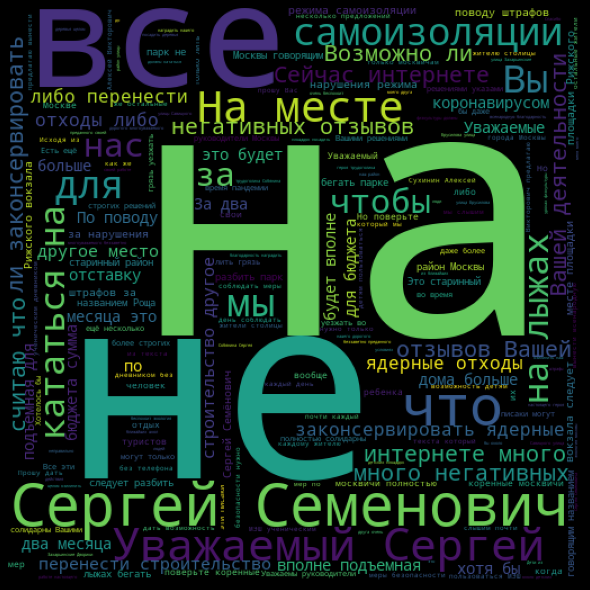

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from math import log, sqrt
import pandas as pd
import numpy as np
%matplotlib inline

totalTexts = source_texts['texts'].shape[0]
trainIndex, testIndex = list(), list()
for i in range(source_texts.shape[0]):
  if np.random.uniform(0, 1) < 0.75:
    trainIndex += [i]
  else: 
    testIndex += [i]
trainData = source_texts.loc[trainIndex]
testData = source_texts.loc[testIndex]

trainData.reset_index(inplace = True)
trainData.drop(['index'], axis = 1, inplace = True)
trainData.head()

spam_words = ' '.join(list(source_texts[source_texts['label'] == 10]['texts']))
spam_wc = WordCloud(width = 512, height = 512).generate(spam_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

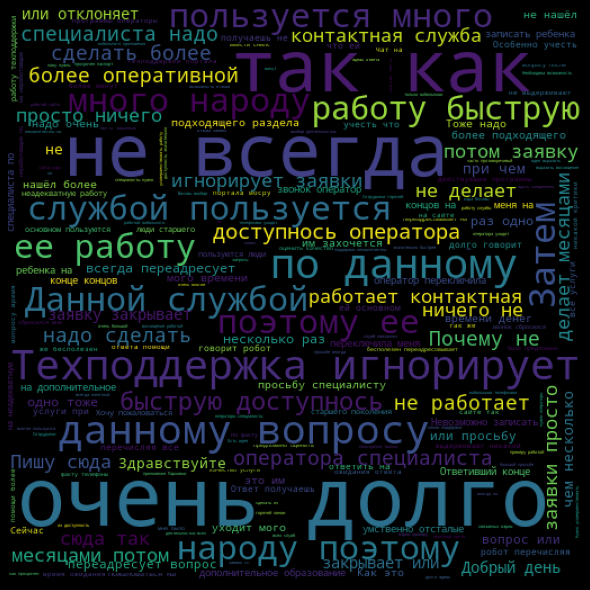

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from math import log, sqrt
import pandas as pd
import numpy as np
%matplotlib inline

totalTexts = source_texts['texts'].shape[0]
trainIndex, testIndex = list(), list()
for i in range(source_texts.shape[0]):
  if np.random.uniform(0, 1) < 0.75:
    trainIndex += [i]
  else: 
    testIndex += [i]
trainData = source_texts.loc[trainIndex]
testData = source_texts.loc[testIndex]

trainData.reset_index(inplace = True)
trainData.drop(['index'], axis = 1, inplace = True)
trainData.head()

spam_words = ' '.join(list(source_texts[source_texts['label'] == 11]['texts']))
spam_wc = WordCloud(width = 512, height = 512).generate(spam_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

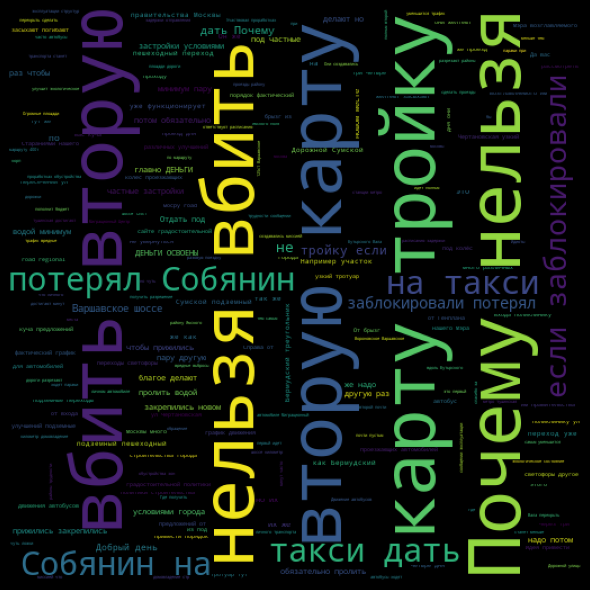

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from math import log, sqrt
import pandas as pd
import numpy as np
%matplotlib inline

totalTexts = source_texts['texts'].shape[0]
trainIndex, testIndex = list(), list()
for i in range(source_texts.shape[0]):
  if np.random.uniform(0, 1) < 0.75:
    trainIndex += [i]
  else: 
    testIndex += [i]
trainData = source_texts.loc[trainIndex]
testData = source_texts.loc[testIndex]

trainData.reset_index(inplace = True)
trainData.drop(['index'], axis = 1, inplace = True)
trainData.head()

spam_words = ' '.join(list(source_texts[source_texts['label'] == 12]['texts']))
spam_wc = WordCloud(width = 512, height = 512).generate(spam_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

# Новый раздел

In [ ]:
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.datasets import fetch_20newsgroups

In [ ]:
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', NearestCentroid()),
                     ])

text_clf.fit(X_train, y_train)

ValueError: ignored

# Ensemble